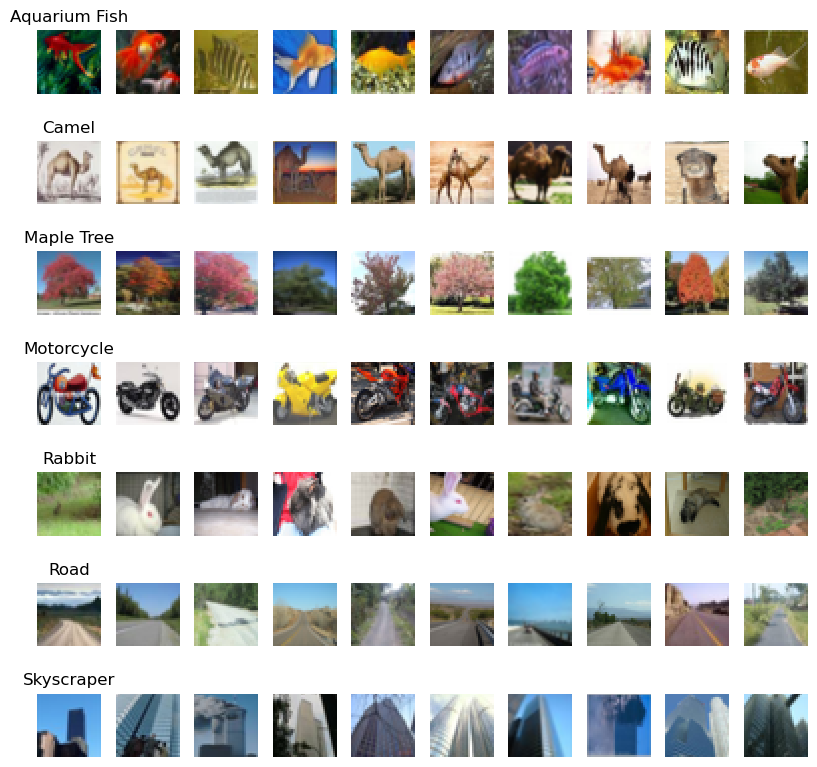

Train setindeki örnek sayısı: 2800
Validation setindeki örnek sayısı: 700


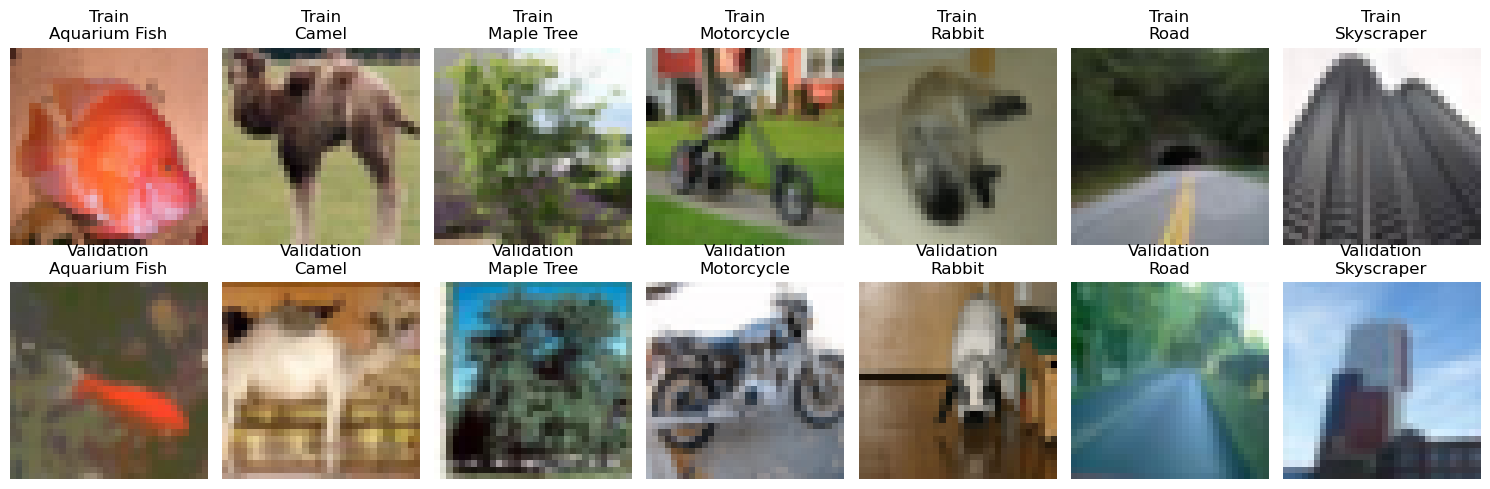

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import cifar100
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten, Dense

# CIFAR-100 veri setini yükle
(x_train, y_train), (_, _) = cifar100.load_data(label_mode='fine')

# İstediğiniz sınıfları ve karşılık gelen isimleri tanımlayın
desired_classes = {
    1: "Aquarium Fish",
    15: "Camel",
    47: "Maple Tree",
    48: "Motorcycle",
    65: "Rabbit",
    68: "Road",
    76: "Skyscraper"
}

# Belirtilen sınıflara ait örnekleri görselleştir
def plot_class_samples(class_indices, num_samples=10):
    fig, axes = plt.subplots(len(class_indices), num_samples, figsize=(8, 8))
    for i, class_index in enumerate(class_indices):
        class_name = desired_classes[class_index]
        class_indices = np.where(y_train == class_index)[0]
        sample_indices = np.random.choice(class_indices, num_samples, replace=False)
        for j, sample_index in enumerate(sample_indices):
            axes[i, j].imshow(x_train[sample_index])
            if j == 0:  # Sadece ilk sütunda sınıf ismini yazdır
                axes[i, j].set_title(class_name)
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Belirtilen sınıflara ait örnekleri göster
plot_class_samples(desired_classes.keys())

# Belirlediğiniz sınıfların etiketlerini listeye dönüştürün
desired_class_indices = list(desired_classes.keys())

# Belirlediğiniz sınıflara ait örneklerin indekslerini bulun
class_indices = []
for class_index in desired_class_indices:
    class_indices.extend(np.where(y_train == class_index)[0])

# Belirlediğiniz sınıflara ait örnekleri ve etiketleri alın
x_train_desired = x_train[class_indices]
y_train_desired = y_train[class_indices]

# Belirlediğiniz sınıflara ait örnekleri train ve validation olarak bölelim
x_train_desired, x_val_desired, y_train_desired, y_val_desired = train_test_split(
    x_train_desired, y_train_desired, test_size=0.2, random_state=42, stratify=y_train_desired
)

# Train ve validation setlerindeki örnek sayılarını yazdır
print(f"Train setindeki örnek sayısı: {len(x_train_desired)}")
print(f"Validation setindeki örnek sayısı: {len(x_val_desired)}")

# Train ve validation setlerini görsel olarak göster
def show_split_samples(train_images, train_labels, val_images, val_labels):
    fig, axes = plt.subplots(2, len(desired_classes), figsize=(15, 5))
    for i, class_index in enumerate(desired_class_indices):
        train_class_indices = np.where(train_labels == class_index)[0]
        val_class_indices = np.where(val_labels == class_index)[0]

        # Train setinden rastgele bir örnek göster
        train_sample_index = np.random.choice(train_class_indices)
        axes[0, i].imshow(train_images[train_sample_index])
        axes[0, i].set_title(f"Train\n{desired_classes[class_index]}")
        axes[0, i].axis('off')

        # Validation setinden rastgele bir örnek göster
        val_sample_index = np.random.choice(val_class_indices)
        axes[1, i].imshow(val_images[val_sample_index])
        axes[1, i].set_title(f"Validation\n{desired_classes[class_index]}")
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Train ve validation setlerini görsel olarak göster
show_split_samples(x_train_desired, y_train_desired, x_val_desired, y_val_desired)


In [3]:
# Modeli oluştur
model = Sequential()

# Convolutional katmanlar
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(AveragePooling2D((2, 2)))

# Düzleştirme katmanı
model.add(Flatten())

# Tam bağlantı katmanları
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Çıkış katmanı
model.add(Dense(100, activation='softmax'))

# Modeli derle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model özetini yazdır
model.summary()

# Modeli eğit
history = model.fit(x_train_desired, y_train_desired, epochs=20, validation_data=(x_val_desired, y_val_desired))


C:\Users\prato\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 5, 5, 256)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,072,868 (7.91 MB)

 Trainable params: 2,072,868 (7.91 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 18s 154ms/step - accuracy: 0.1903 - loss: 5.9602 - val_accuracy: 0.5871 - val_loss: 1.2229
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.4835 - loss: 1.4966 - val_accuracy: 0.6329 - val_loss: 1.0104
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 0.5961 - loss: 1.2140 - val_accuracy: 0.6600 - val_loss: 0.9612
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.6517 - loss: 1.0264 - val_accuracy: 0.6814 - val_loss: 0.9710
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.6525 - loss: 1.0669 - val_accuracy: 0.7214 - val_loss: 0.7927
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.7025 - loss: 0.9209 - val_accuracy: 0.7100 - val_loss: 0.8480
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.7536 - loss: 0.8074 - val_accuracy: 0.7200 - val_loss: 0.8309
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.7520 - loss: 0.7391 - val_accu

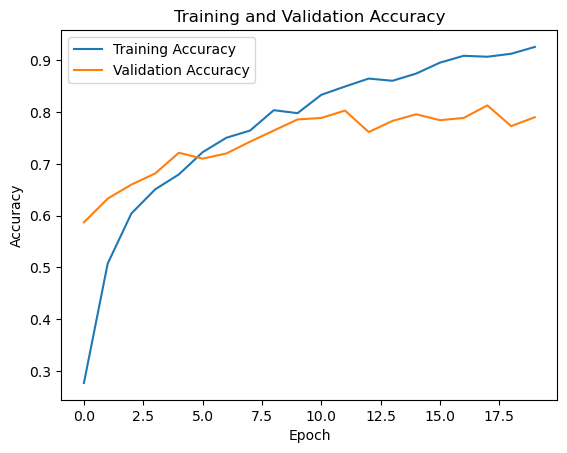

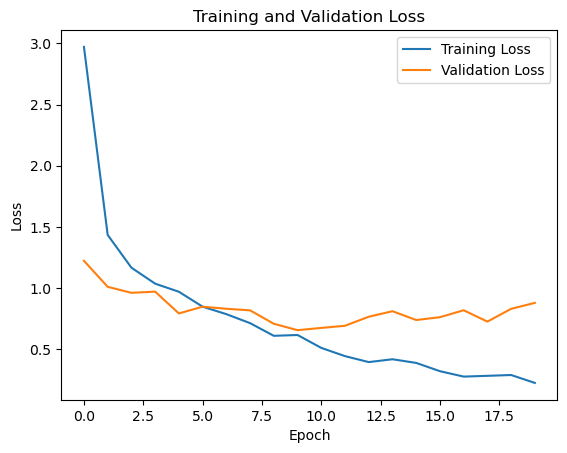

In [5]:
# Eğitim sürecindeki doğruluk ve kayıp değerlerini al
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Doğruluk değerlerini grafiğe dök
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Kayıp değerlerini grafiğe dök
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


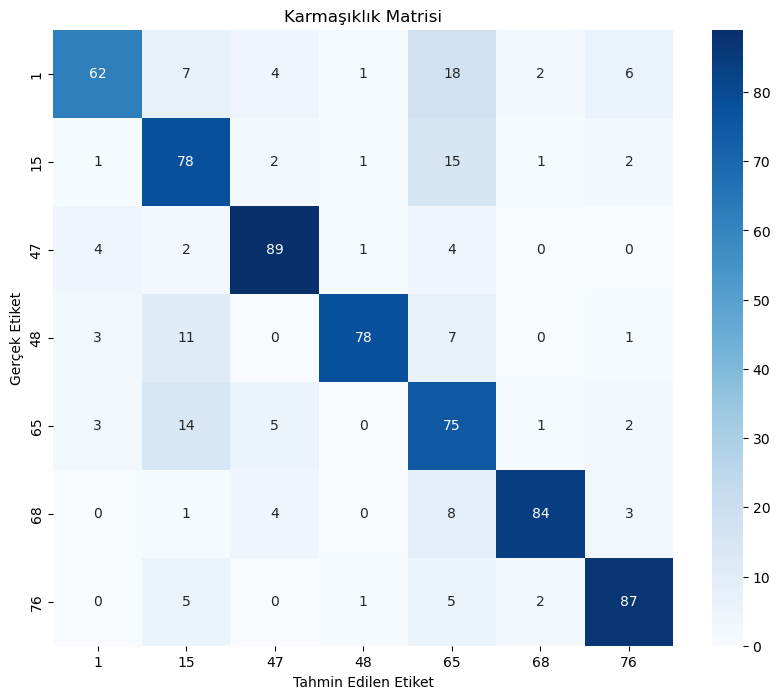

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Test setindeki tahminleri yap
y_pred = model.predict(x_val_desired)
y_pred_classes = np.argmax(y_pred, axis=1)

# Gerçek etiketler ve tahmin edilen etiketler arasındaki karmaşıklık matrisini hesapla
cm = confusion_matrix(y_val_desired, y_pred_classes)

# Karmaşıklık matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_class_indices, yticklabels=desired_class_indices)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karmaşıklık Matrisi')
plt.show()


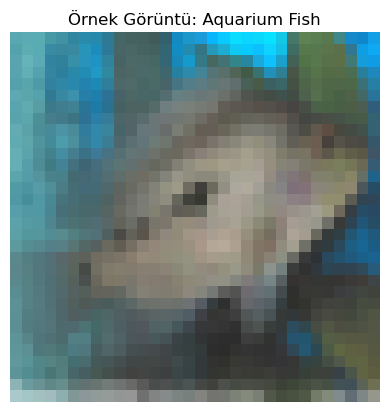

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Aquarium Fish için tahmin edilen çıkış vektörü:
[[4.78999702e-08 8.74664307e-01 3.98379250e-08 1.63652066e-06
  1.73277999e-06 5.30243796e-08 1.19458093e-07 2.65092961e-08
  1.45393741e-07 3.11302939e-09 2.09455251e-07 2.65360200e-07
  3.32886739e-05 7.67452718e-07 5.79731534e-07 2.05755699e-02
  4.61478784e-08 1.95519283e-06 7.33138350e-08 1.40021172e-07
  1.43802680e-07 3.03509839e-09 4.23021646e-07 6.83766257e-06
  3.62376440e-08 1.85187133e-07 7.87314491e-07 3.33779981e-09
  1.11479315e-08 6.55607195e-08 7.84796867e-08 4.42754633e-09
  6.23149132e-09 8.16051404e-09 4.82809241e-07 3.55751649e-06
  6.79209311e-09 2.51802028e-08 6.93853679e-07 1.80517725e-06
  3.68161643e-08 6.07798029e-07 1.28033761e-07 1.74594472e-09
  9.03728562e-07 5.92371912e-08 6.76163324e-07 1.15986392e-02
  8.31112033e-04 1.12282441e-06 6.59520367e-08 2.24009295e-06
  1.20645991e-08 6.78192222e-08 8.63507194e-06 3.07605802e-07
  1.07887175e-08 8.44404155e-07 1.35738148e-07

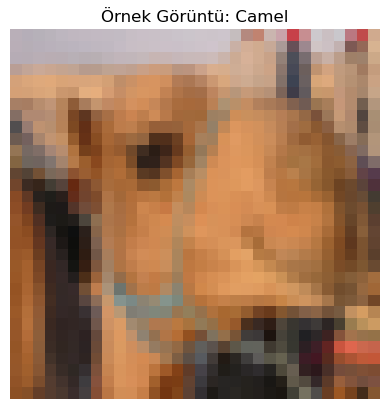

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Camel için tahmin edilen çıkış vektörü:
[[1.82959604e-15 2.64280498e-05 1.59289560e-14 5.07474618e-12
  4.15713606e-13 1.82884842e-16 2.75241756e-11 3.77111011e-15
  4.40654830e-14 5.00375666e-19 4.58926550e-14 2.49848360e-14
  1.99133432e-10 4.53524777e-13 2.60927591e-13 9.95914876e-01
  1.88826903e-14 2.97826217e-13 4.20943315e-15 3.09505229e-14
  3.44182175e-13 2.82849564e-15 2.02542518e-15 6.33943462e-12
  3.63699244e-14 5.00363326e-15 1.21612301e-13 5.55207134e-17
  1.02479234e-15 9.90958499e-15 1.04632451e-16 1.08104664e-16
  3.55836308e-18 1.28451924e-16 9.90139611e-13 9.66811917e-13
  3.63353523e-16 2.09472891e-14 3.70358995e-12 5.28735584e-13
  1.12587447e-16 9.29884099e-13 8.73473115e-14 1.03247055e-17
  1.33367588e-11 1.19515087e-14 2.68079157e-12 6.48080022e-05
  5.94505291e-05 2.42762651e-13 1.83318801e-14 5.28749624e-13
  1.21301312e-15 1.46352538e-14 3.29746061e-12 6.72078207e-15
  7.72507018e-16 1.18794330e-12 3.03360852e-14 8.23049

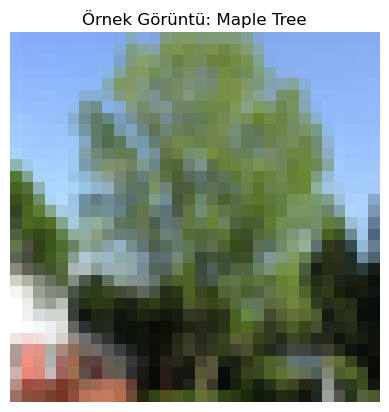

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Maple Tree için tahmin edilen çıkış vektörü:
[[1.04489693e-31 4.42484972e-11 8.79034293e-28 3.31867393e-24
  6.20682744e-29 5.91289730e-34 1.39297951e-28 1.35774384e-30
  1.60114064e-27 8.09745640e-36 7.49400000e-23 5.57250949e-31
  1.44495902e-21 4.15129098e-24 2.35186933e-28 1.27762156e-09
  1.53106876e-27 2.23363238e-26 6.73750615e-27 7.95563835e-27
  1.18149023e-27 1.54977983e-33 2.63820113e-29 2.74326127e-23
  3.68760307e-32 1.74140621e-27 6.35818218e-31 8.08742639e-35
  5.32908072e-32 8.43052511e-30 6.12308866e-35 2.78852210e-32
  1.20376940e-33 2.58756611e-31 8.67462821e-26 1.22429622e-22
  3.72251601e-30 5.34648119e-28 5.26244911e-27 1.22699812e-23
  1.48183699e-33 3.14339988e-24 1.53138067e-24 5.55832247e-33
  6.00953929e-27 4.09405160e-29 3.04273758e-25 1.00000000e+00
  1.13022215e-14 2.03543086e-25 1.28974112e-28 2.23490359e-25
  9.76672237e-29 3.54102180e-31 7.04666375e-20 1.07356865e-29
  2.93013088e-29 1.47040315e-22 7.00770856e-29 3.

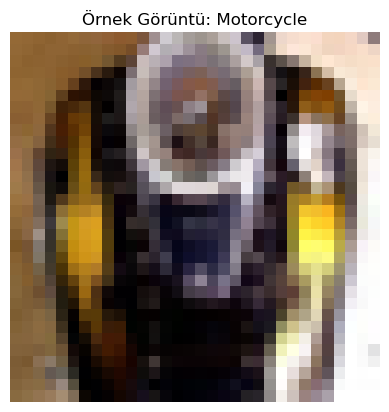

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Motorcycle için tahmin edilen çıkış vektörü:
[[2.02301474e-11 1.69217698e-02 1.32434702e-10 5.88059468e-09
  2.24037002e-08 2.46225644e-11 2.16998708e-09 5.98198505e-11
  1.47418716e-10 1.04068707e-12 5.79226112e-10 1.33986350e-10
  2.89091648e-08 3.03101100e-09 1.80017876e-11 1.15423249e-02
  8.51766435e-11 2.54621491e-10 5.79422788e-10 2.09665063e-09
  4.57354814e-11 1.82077048e-10 2.95495156e-10 1.46225820e-09
  1.31050920e-10 7.14891313e-10 9.08019882e-10 5.87365833e-12
  3.78079902e-12 7.28586028e-12 8.81944170e-12 1.52589215e-12
  8.00052570e-14 3.89834519e-12 4.91182539e-10 1.69895387e-08
  7.09048271e-13 7.46260952e-12 1.51087605e-08 3.44124129e-09
  1.53409889e-11 5.08819298e-09 1.43395587e-10 4.23220893e-13
  2.67440381e-09 4.78569517e-10 1.31323230e-09 1.08146423e-03
  9.06625748e-01 1.19992835e-10 1.03158992e-09 5.68062397e-08
  5.31042745e-12 8.01830043e-12 7.04614234e-09 2.08586308e-11
  1.48223326e-11 1.22420065e-08 4.21859547e-10 4.

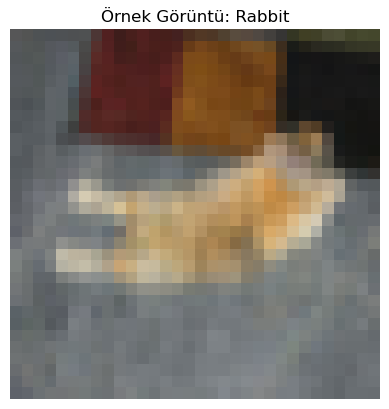

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Rabbit için tahmin edilen çıkış vektörü:
[[3.24322173e-07 4.61540893e-02 1.48946754e-07 1.83303964e-05
  3.37075994e-06 1.95518865e-07 2.77282516e-06 1.50681865e-06
  1.69460441e-06 5.88235416e-08 4.09474751e-06 5.27743907e-07
  1.07988904e-04 3.49934430e-06 2.42127612e-07 1.90462489e-02
  2.48905735e-06 1.13465403e-05 5.70736120e-07 1.69611440e-06
  1.48828406e-06 2.02121598e-07 6.66738970e-07 1.20767745e-05
  5.09875463e-07 2.49787240e-06 1.07113578e-06 1.30872593e-08
  1.40914565e-07 3.04957575e-06 1.69349519e-07 5.69375516e-08
  1.27225031e-08 2.89268627e-07 2.11305305e-05 9.89237742e-05
  8.21038455e-08 3.01266186e-06 1.49122561e-05 3.95957977e-05
  1.86949407e-07 1.54805857e-05 3.82285862e-06 3.11168407e-08
  2.60632646e-06 2.04847811e-06 2.51678421e-06 3.80251301e-03
  2.98750028e-03 2.80400818e-05 2.58403702e-06 3.97310650e-05
  2.46568561e-07 3.86238270e-07 3.97268042e-04 5.51435824e-06
  4.34086672e-07 5.74311780e-05 4.81995528e-07 1.0294

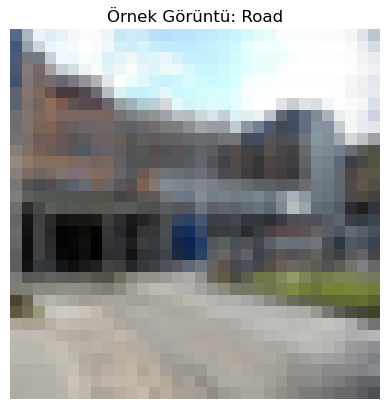

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Road için tahmin edilen çıkış vektörü:
[[2.35138861e-16 3.55996349e-07 1.04928239e-15 1.13860700e-12
  1.01217450e-12 3.62283403e-17 1.25684706e-12 5.35118147e-16
  2.70981256e-14 4.00850360e-18 9.42223526e-14 6.69603050e-16
  4.10074440e-11 3.33080373e-12 6.69337452e-16 1.79026960e-04
  3.06459061e-16 4.71457590e-14 1.80464049e-16 2.64131165e-13
  2.05382450e-14 4.91470242e-15 1.06328097e-14 1.08334435e-11
  4.83954096e-15 4.72444061e-15 4.48586453e-13 9.83068755e-18
  4.88505209e-17 5.91737175e-15 3.84755038e-18 1.16603058e-16
  3.47125310e-19 3.29967429e-16 3.91456832e-12 3.36041243e-12
  4.33295320e-18 2.39743650e-16 7.23350348e-14 4.52841974e-12
  6.11881629e-18 2.35340371e-12 4.53752805e-14 4.87057345e-18
  8.78163576e-14 8.62307526e-14 3.94528194e-14 3.53621454e-06
  2.84807811e-06 2.60048114e-13 2.25882765e-14 1.56321386e-12
  7.58151980e-16 2.66518387e-16 1.02299740e-11 5.87863525e-13
  1.53643103e-14 6.56949647e-13 2.84051731e-16 1.084509

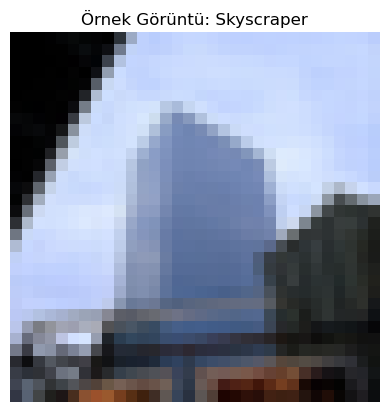

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Skyscraper için tahmin edilen çıkış vektörü:
[[6.20810903e-11 1.15953758e-02 2.41916851e-11 2.29714536e-09
  4.78907226e-11 1.32725471e-11 2.65069189e-10 2.55430724e-12
  2.47245141e-10 5.04776546e-14 1.08182940e-09 8.38411007e-11
  3.67897464e-08 1.50895474e-09 3.82626819e-10 7.28723608e-05
  6.58378768e-11 3.72413975e-11 1.23308542e-11 1.18885027e-10
  4.42799443e-11 9.14886222e-12 9.62059044e-11 3.19554374e-08
  9.52971035e-12 1.32770683e-09 2.06520287e-11 7.99616775e-13
  1.48691129e-11 1.27963525e-12 4.40308241e-11 2.74603636e-13
  6.68049736e-14 3.60640576e-12 3.47838114e-09 4.40142642e-08
  9.14648348e-13 5.18481404e-11 3.08030434e-10 2.30287803e-10
  6.76876957e-13 4.53336646e-10 4.40807356e-11 3.80108000e-13
  2.48519982e-09 6.01010908e-11 1.25594438e-10 1.04015670e-03
  8.46568510e-05 2.34876812e-10 2.62984357e-10 4.98330222e-09
  3.89500151e-12 6.00156314e-11 4.63483252e-09 9.20763257e-11
  4.25532092e-12 4.71595429e-09 2.54628697e-11 4.

In [54]:
# Her sınıftan örnek bir görüntü için tahminler
for class_index, class_name in desired_classes.items():
    # Belirli bir sınıfa ait bir örnek görüntü seçme
    class_indices = np.where(y_train == class_index)[0]
    sample_index = np.random.choice(class_indices)
    sample_image = x_train[sample_index]
    
    # Örnek görüntüyü görselleştirme
    plt.imshow(sample_image)
    plt.title(f"Örnek Görüntü: {class_name}")
    plt.axis('off')
    plt.show()
    
    # Model tarafından tahmin etme
    prediction = model.predict(np.expand_dims(sample_image, axis=0))
    
    # Tahmin edilen çıkış vektörünü gösterme
    print(f"{class_name} için tahmin edilen çıkış vektörü:")
    print(prediction)
    print("\n" + "="*50 + "\n")
